<a href="https://colab.research.google.com/github/maiyehezkel/Data-science/blob/main/names_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from bs4 import BeautifulSoup
from google.colab import files
import pandas as pd
import requests
import csv

country=["african","akkadian","albanian","anglo_saxon","arabian","aramic","aremenian","arthurian_legend","assyrian","nahuatl","babylonian","basque","bulgarian","celtic","chamoru","chinese","cornish","croatian","czechoslovakian","denish","dutch","egtptian","english","esperanto","finish","french","gaelic","german","greek","hawaiian","hebrew","hindi","hungarian","icelandic","irish","italian","japanese","korean","latin","lithuania","native_american","norse","norwegian","persian","polish","portuguese","romanian","russian","scandinavian","scottish","serbian","slavic","slovene","spanish","swedish","swiss","teutonic","thai","turkish","ukrainian","vietnamese","welsh","yiddish"]
gender=["female","male"]
names_dataBase=open('names_description.csv','w')
writer = csv.writer(names_dataBase)
lang_database=open('names_other_languages.csv','w')
writerlang = csv.writer(lang_database)
writer.writerow(["Name","Meaning","Gender","Location"])
writerlang.writerow(["Original name","Name in other language","Language","Location"])

for i in range(len(country)):
    for j in range(len(gender)):
      url = "http://www.20000-names.com/"+gender[j]+"_"+country[i]+"_names.htm"
      result = requests.get(url)
      doc = BeautifulSoup(result.text, "html.parser")
      database = doc.find_all('li')
      fulldatabase1=[]
      for li in database:
        fulllist1=[]
        fulllist2=[]
        data=li.text
        dataClean= data.strip()
        dataClean2 = dataClean.replace("\r","").replace("\n","").replace("'","").replace(", or,","/").replace(":",",").replace(".",",")
        listofnm= dataClean2.rsplit(",")
        nameClean= listofnm[0].split(":",0)
        fullname= nameClean[0].split("(",1)
        onlyname= fullname[0]
        fulllist1.append(onlyname.strip())
        if(len(fullname)==2):
          originalname=fullname[1].replace(")","")
          fulllist2.append(onlyname.strip())
          fulllist2.append(originalname.strip())
          fulllist2.append(country[i])
          writerlang.writerow(fulllist2)
        meaning=listofnm[1].split("meaning")
        if(len(meaning)>=2):
          fulllist1.append(meaning[1].strip().replace('"','').replace("     ",""))
        else:
          fulllist1.append(meaning[0].strip().replace('"','').replace("     ",""))
        fulllist1.append(gender[j])
        fulllist1.append(country[i])
        fulldatabase1.append(fulllist1)
        writer.writerow(fulllist1)
names_dataBase.close()
lang_database.close()
results_df = pd.DataFrame(fulldatabase1, columns=['name', 'meaning', 'gender', 'location'])
files.download('names_description.csv')
files.download('names_other_languages.csv')





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
results_df

,name,meaning,gender,location
0,AIZIK,Yiddish form of Hebrew Yitzchak,male,yiddish
1,ALTER,old; elder in Yiddish and the other in Latin,male,yiddish
2,ANSHEL,Yiddish pet form of Hebrew Asher,male,yiddish
3,ARKE,Yiddish form of Hebrew Aharown,male,yiddish
4,AVROM,Variant spelling of Yiddish Avrum,male,yiddish
...,...,...,...,...
68,ZELIG,Variant spelling of Yiddish Selig,male,yiddish
69,ZIK,Pet form of Yiddish Itzik,male,yiddish
70,ZINDEL,son,male,yiddish
71,ZUSMAN,Variant spelling of Yiddish Zusmann,male,yiddish


In [53]:
import networkx as nx

import pandas as p

G = nx.from_pandas_edgelist(results_df,'meaning','name', edge_attr=True)


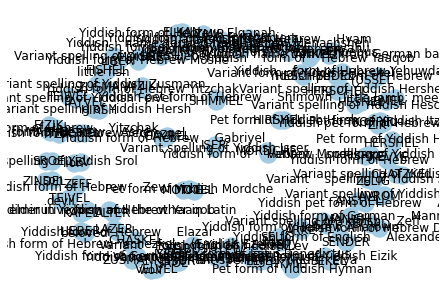

In [52]:
import matplotlib.pyplot as plt


pos=nx.spring_layout(G)
nx.draw(G,pos,node_color='#A0CBE2',edge_color='#BB0000',width=2,edge_cmap=plt.cm.Blues, with_labels=True)


